## This google colab notebook introduces basic Image Processing Methods such as Image Histogram, Intensity Transformation, Thresholding and Filtering. Use the following drive link to access the images.
https://drive.google.com/open?id=1QC910Yh70rkaUm9B3fLEJQRQMCbNkw9h


## Mounting the google drive and loading requried libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go
from skimage import morphology as morp
from skimage.morphology import disk, dilation

## Various ways of reading images

In [1]:
ls

sample_data/


### Ex 4: Write a script which reads 'coin.jpg' as input and outputs a new image containing:

### only the coins touching the boundary of the image

### only the coins which overlap with each other

### only non-overlapping coins

In [0]:
def black(I,x,y,a,b):
  I[x-a:x+a,y-b:y+b]=0
  return I

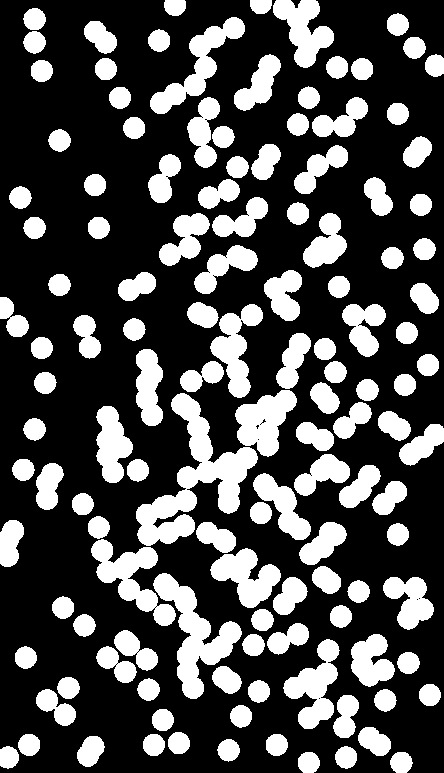

773 444
FINAL COINS


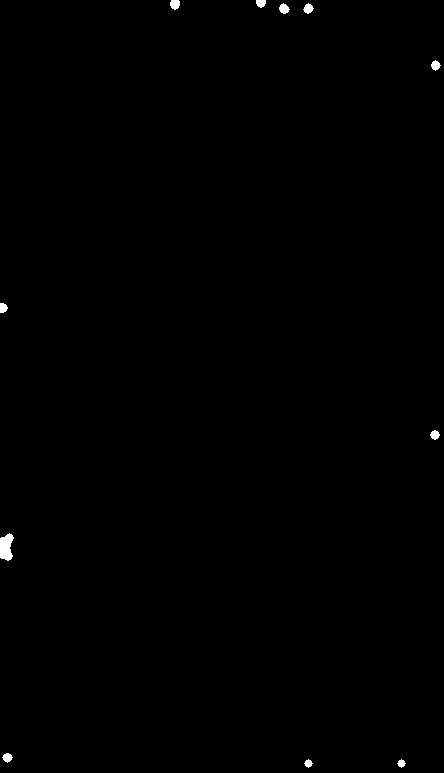

Number of coins touching the boundary = 13 



In [0]:
#first part
I= cv2.imread('./coins.jpg',cv2.IMREAD_GRAYSCALE)

cv2_imshow(I)
a,b=I.shape
print(a,b)
se=morp.disk(10)
a,b=se.shape
erosion=cv2.erode(I,se)
erosion[10:I.shape[0]-10,10:I.shape[1]-10]=0
I=cv2.dilate(erosion,morp.disk(4))
# cv2_imshow(I)
# count=0
q=int(a)
w=int(b)
# I=binary
ret,thresh1 = cv2.threshold(I,120,255,cv2.THRESH_BINARY)
img=thresh1
print("FINAL COINS")
cv2_imshow(img)
count=0
# s=0
# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#     s+=1
#     if(img[i][j]>=50):
#       count=count+1
#       x1=i-q
#       if(x1<0):
#         x1=0
#       x2=i+q
#       if(x2>img.shape[0]-1):
#         x1=img.shape[0]-1
#       y1=j-w
#       if(y1<0):
#         y1=0
#       y2=j+w
#       if(y2>img.shape[1]-1):
#         y2=img.shape[1]-1
#       img[x1:x2,y1:y2]=0
#       cv2_imshow(img)
# print(s)
# print(img.shape[0]*img.shape[1])
# cv2_imshow(img)
# print(count)
erosion=img
flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0


for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255 and i>10 and i< len(erosion)-10 and j>10 and j<len(erosion[i])-10:
      erosion[i][j]=0
    elif erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins touching the boundary =",count,"\n")
# flag=np.zeros((erosion.shape[0],erosion.shape[1]))
# count=0
# print("HI")
# for i in range(erosion.shape[0]):
#   for j in range(erosion.shape[1]):
#     if(erosion[i][j]==255):
#       if(flag[i][j]==0):
#         count+=1
#         # x1=max(0,i-15)
#         # x2=min()
#         for k in range(max(0,i-200),min(erosion.shape[0]-1,i+200)):
#           for l in range(max(0,j-200),min(erosion.shape[1]-1,j+200)):
#             erosion[k][l]=0
# cv2_imshow(erosion)
# print("Number of coins overlapping =",count,"\n")

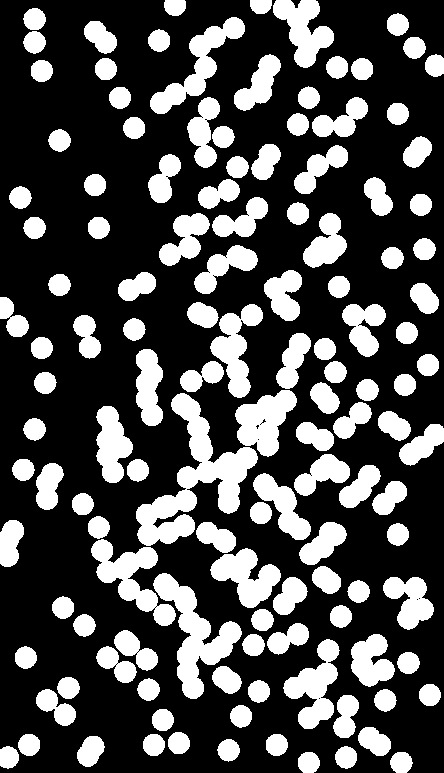

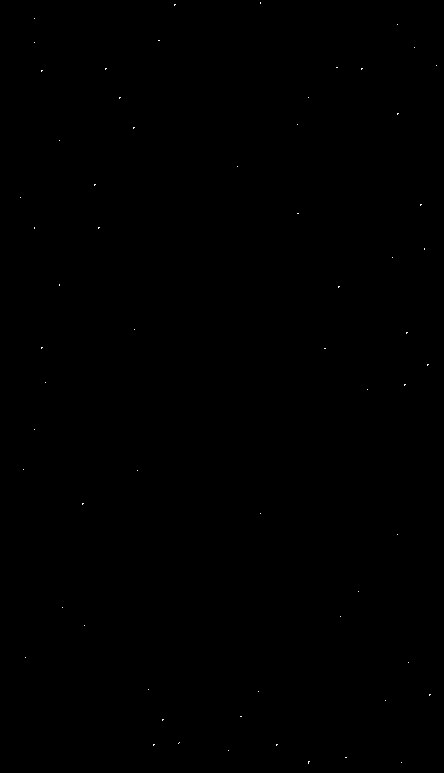

FINAL IMAGE


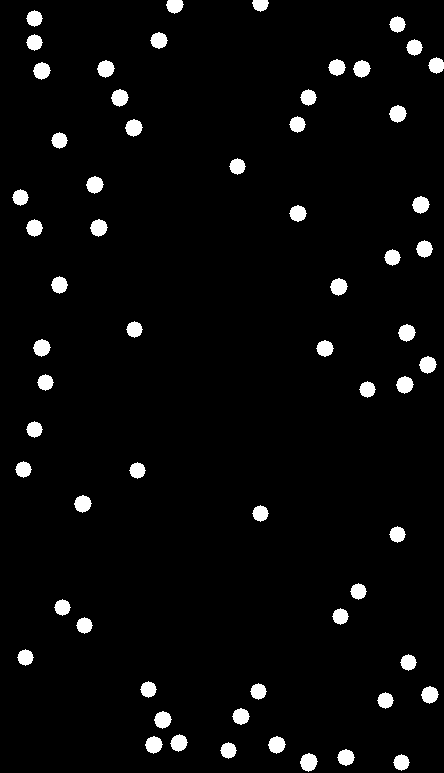

Number of coins overlapping = 186 



In [0]:
#second part
I= cv2.imread('./coins.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
a,b=I.shape
se=np.zeros((25,25))
disk=morp.disk(8)
q,w=disk.shape
q=int(q)
w=int(w)
se[6:6+q,6:6+w]=disk
a,b=se.shape
se[0,:]=-1
se[se.shape[0]-1,:]=-1
se[:,0]=-1
se[:,se.shape[1]-1]=-1
# se[a/2][b/2]=1
x=a/2
y=b/2
x=int(x)
y=int(y)
se[x][y]=1
erosion = I
output_image = cv2.morphologyEx(erosion,cv2.MORPH_HITMISS,se)
cv2_imshow(output_image)
final_image = cv2.dilate(output_image,morp.disk(8))
# cv2_imshow(final_image)
ret,thresh1 = cv2.threshold(final_image,120,255,cv2.THRESH_BINARY)
print("FINAL IMAGE")
cv2_imshow(thresh1)
erosion=thresh1
flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0
for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins overlapping =",count,"\n")

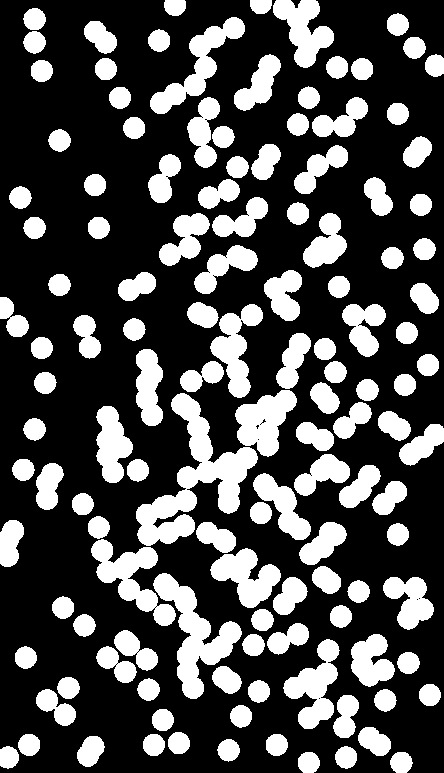

AFTER HIT AND MISS


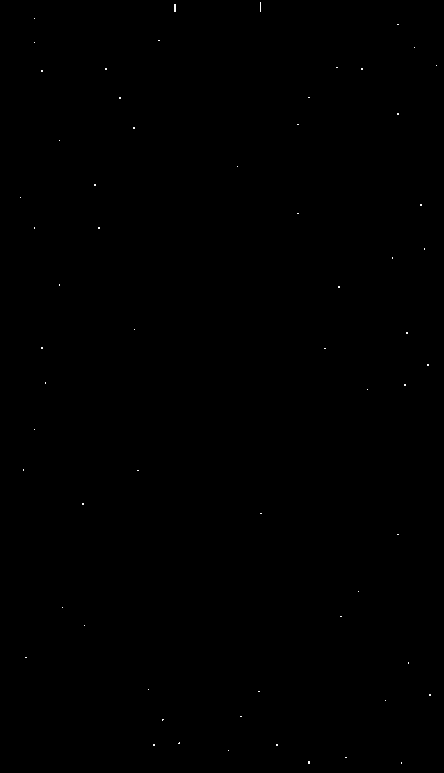

FINAL IMAGE


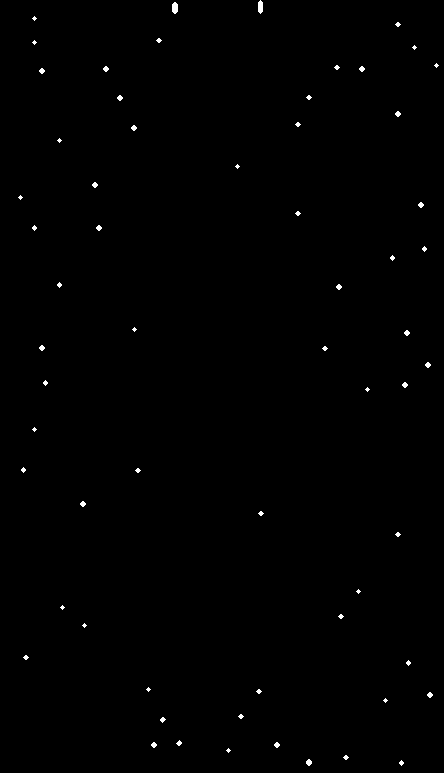

Number of coins non-overlapping = 64 



In [0]:
#third part
I= cv2.imread('./coins.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
a,b=I.shape
se=np.zeros((25,25))
a,b=se.shape
se[0,:]=-1
se[se.shape[0]-1,:]=-1
se[:,0]=-1
se[:,se.shape[1]-1]=-1
# se[a/2][b/2]=1
x=a/2
y=b/2
x=int(x)
y=int(y)
se[x][y]=1
erosion = I
output_image = cv2.morphologyEx(erosion,cv2.MORPH_HITMISS,se)
print("AFTER HIT AND MISS")
cv2_imshow(output_image)
final_image = cv2.dilate(output_image,morp.disk(2))
ret,thresh1 = cv2.threshold(final_image,120,255,cv2.THRESH_BINARY)
print("FINAL IMAGE")
cv2_imshow(thresh1)
erosion=thresh1
flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0
for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins non-overlapping =",count,"\n")

### HW: Read the image 'objects.png' and try to answer the following questions using code


#### How many objects have one or more holes?
#### How many square objects are in the image?
#### Identify the square objects that have holes.
#### Identify the circular objects that have no holes

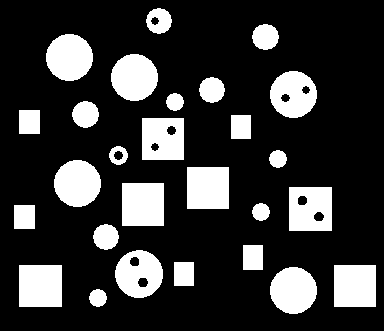

(331, 384)


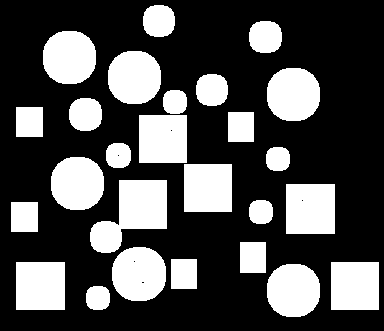

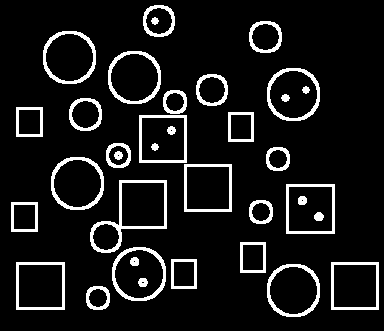

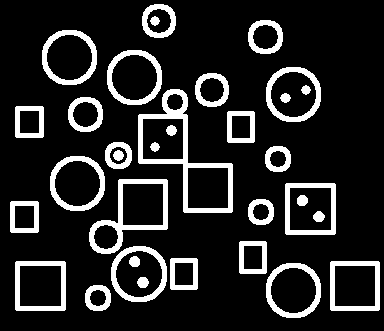

(3, 3)
[[-1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  1.  0.  0. -1.]
 [-1.  0.  0.  1.  1.  1.  0. -1.]
 [-1.  0.  0.  0.  1.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  0.  0. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.]]


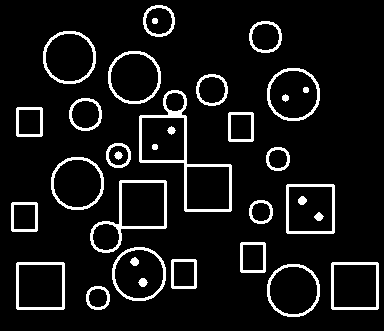

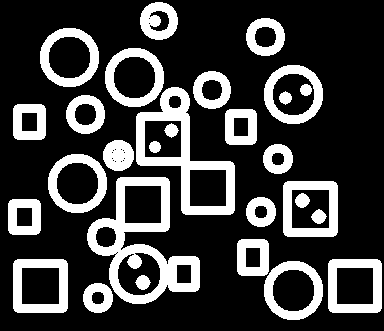

In [0]:
I=cv2.imread('./objects.png',cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
# ret,thresh1 = cv2.threshold(I,120,255,cv2.THRESH_BINARY)
# I=thresh1
print(I.shape)
se = morp.square(3)
dilate1=cv2.dilate(I,se,iterations=3)
cv2_imshow(dilate1)
final=dilate1-I
cv2_imshow(final)
final=cv2.dilate(final,morp.disk(1))
cv2_imshow(final)
dis = morp.disk(1,dtype='uint8')
print(se.shape)
se2 = np.zeros((8,8))
se2[3:3+dis.shape[0],3:3+dis.shape[1]]=dis
se2[0,:]=-1
se2[:,0]=-1
se2[se2.shape[0]-1,:]=-1
se2[:,se2.shape[1]-1]=-1
print(se2)
output_image = cv2.morphologyEx(final,cv2.MORPH_HITMISS,se)
cv2_imshow(output_image)
final=cv2.dilate(output_image,morp.disk(3))
cv2_imshow(final)
#I can find the number of holes but not sure how to find number of objects wit holes
#Not sure how to find number of squares or circles,if I try to hit and miss with a big square it misses the small squares, if I do with a smaller square then it gets the bigger circles

RED


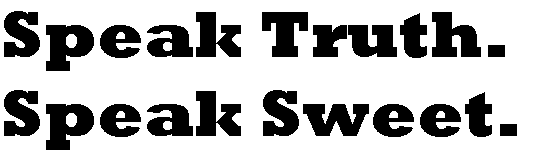

10
BLUE


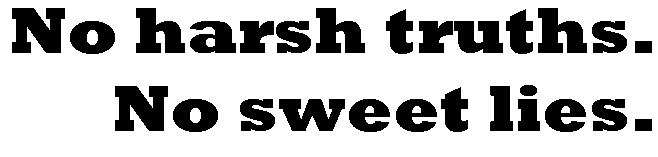

8
GREEN


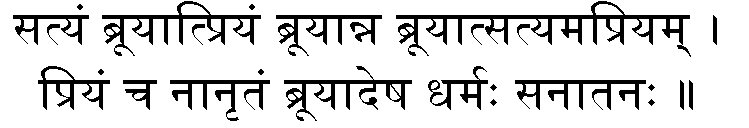

35
BLACK


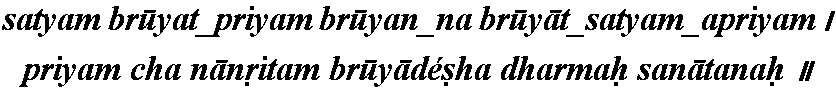

48
PURPLE


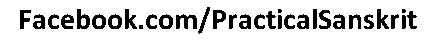

12


In [0]:
#homework for connected
I= cv2.imread('./text2.png')
I1=cv2.imread('./1.PNG',cv2.IMREAD_GRAYSCALE)
I2=cv2.imread('./2.PNG',cv2.IMREAD_GRAYSCALE)
I3=cv2.imread('./3.PNG',cv2.IMREAD_GRAYSCALE)
I4=cv2.imread('./4.PNG',cv2.IMREAD_GRAYSCALE)
I5=cv2.imread('./5.PNG',cv2.IMREAD_GRAYSCALE)
# return_histogram(I2).show()
# return_histogram(I3).show()
# return_histogram(I4).show()
# return_histogram(I5).show()
ret,I1 = cv2.threshold(I1,200,255,cv2.THRESH_BINARY)
T=I1
final1 = cv2.connectedComponents(I1,T,connectivity=4)
print("RED")
cv2_imshow(I1)
print(final1[0])
ret,I2 = cv2.threshold(I2,200,255,cv2.THRESH_BINARY)
T=I2
final2 = cv2.connectedComponents(I2,T,connectivity=4)
print("BLUE")
cv2_imshow(I2)
print(final2[0])
ret,I3 = cv2.threshold(I3,200,255,cv2.THRESH_BINARY)
T=I3
final3 = cv2.connectedComponents(I3,T,connectivity=4)
print("GREEN")
cv2_imshow(I3)
print(final3[0])
ret,I4 = cv2.threshold(I4,200,255,cv2.THRESH_BINARY)
T=I4
final4 = cv2.connectedComponents(I4,T,connectivity=4)
print("BLACK")
cv2_imshow(I4)
print(final4[0])
ret,I5 = cv2.threshold(I5,200,255,cv2.THRESH_BINARY)
T=I5
final5 = cv2.connectedComponents(I5,T,connectivity=4)
print("PURPLE")
cv2_imshow(I5)
print(final5[0])

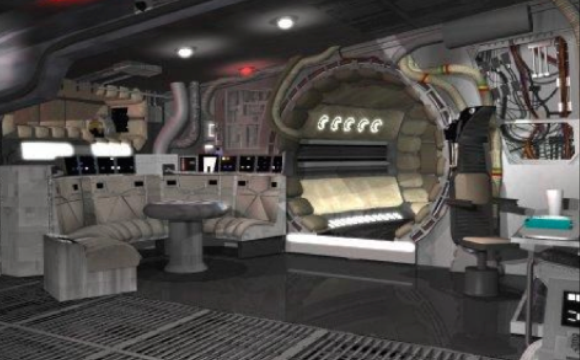

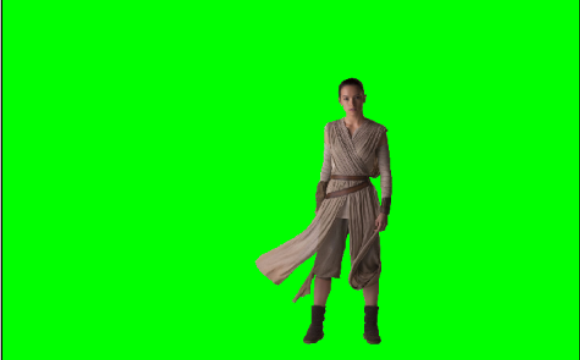

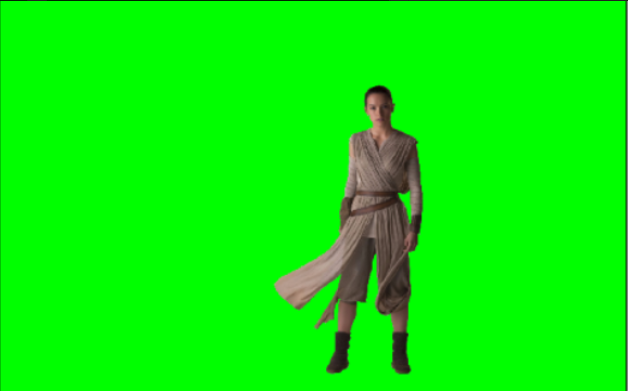

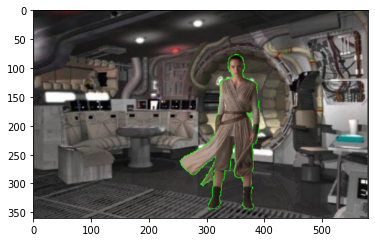

In [0]:

# HW: Chroma Keying: Perform chroma Keying on the images rose.jpeg and chroma_img.jpg on a suitable background. Experiment with different backgrounds and show some interesting results.
image = cv2.imread('./star.PNG')
img = cv2.imread('./chroma_keying_demo.png')
a,b,c=img.shape
q=int(b/3)
first=img[:,0:q,:]
second=img[:,q:2*q,:]
cv2_imshow(first)
cv2_imshow(second)
cv2_imshow(image)
image=second
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)
lower_blue = np.array([0, 100, 0])     ##[R value, G value, B value]
upper_blue = np.array([0, 255, 0]) 
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image)
background_image = first
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
# plt.imshow(background_image)
crop_background = background_image[0:720, 0:1280]

crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

final_image = crop_background + masked_image
plt.imshow(final_image)


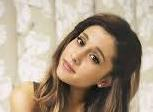

(112, 153, 3)


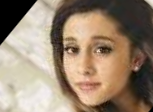

In [0]:
# HW: Face Alignment: Read the image 'face.jpg' and rotate the image such that eyes are aligned with respect to the x axis. Then show only the face by taking coordinates from the user and scale to the same size.
import math
img=cv2.imread('./tilted_face.jpg')
cv2_imshow(img)
print(img.shape)
#tilt the image
a,b,c=img.shape
p1=np.float32([94, 58]) 
p2=np.float32([80, 41])
p3=p1-p2
theta=math.degrees(math.atan(p3[1]/p3[0]))
M1 = cv2.getRotationMatrix2D((87,50),theta,1.4)
im_affine= cv2.warpAffine(img,M1,(b,a))
cv2_imshow(im_affine)


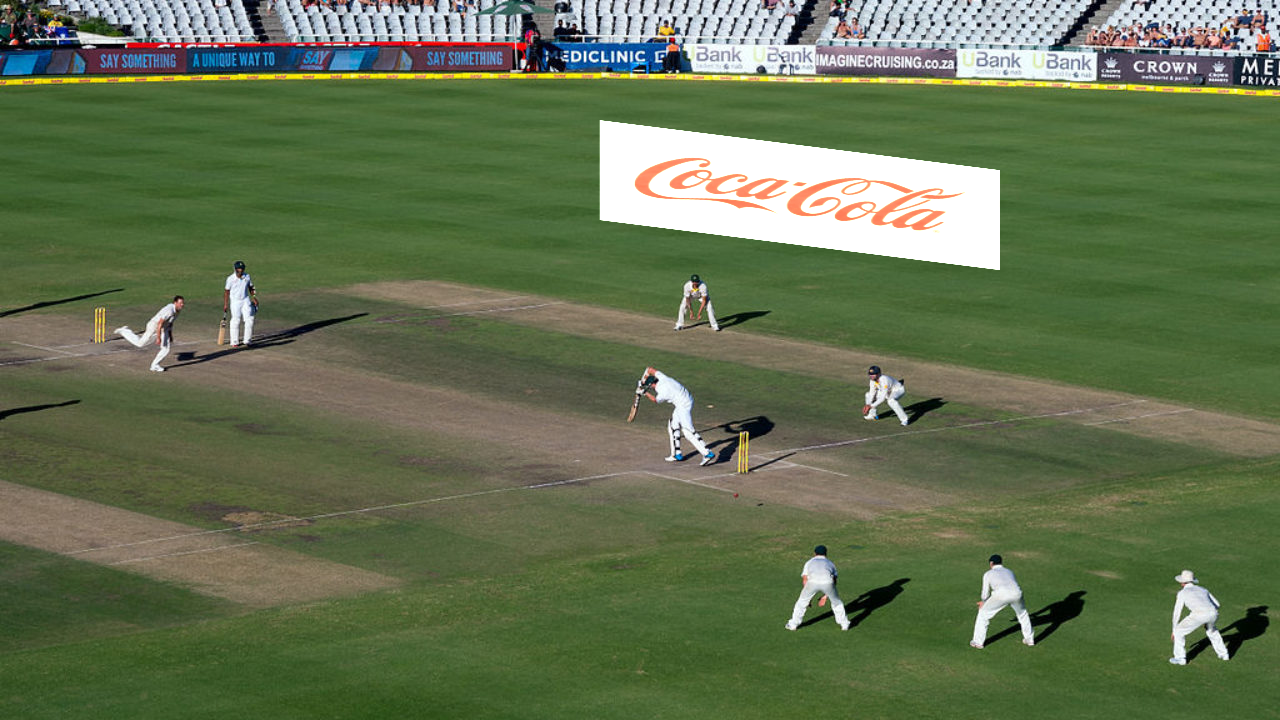

In [0]:
# HW: Perspective Transformation: Put the banner of coco-cola on the field. Experiment with these functions and show some interesting results.
first=cv2.imread('./coca.jpg')
second=cv2.imread('./stadium.jpg')
third=cv2.imread('./overlaid.png')
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords
M = cv2.getPerspectiveTransform(pts1,pts2)
im_affine= cv2.warpPerspective(first,M,(second.shape[1],second.shape[0]))
final=cv2.add(second,im_affine)
cv2_imshow(final)